<a href="https://colab.research.google.com/github/jacksonguedes/IACD/blob/main/Atividade02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn
from math import ceil
import random
import statistics as sts

In [ ]:
def map_condition(life_expectation):
    if 0 <= life_expectation < 10:
        return "lf < 10 "
    elif life_expectation < 20:
        return " 10 < lf < 20"
    elif life_expectation < 40:
        return " 20 < lf < 40"
    elif life_expectation <= 60:
        return "40 < lf < 60"
    return "unknown"

In [ ]:
def box_plot_histogram(dataframe, feature, bins = 20):
    for classe, df in dataframe.items():
        title = feature + " - '" + classe + "' life expectation"

        #BoxPlot
        plt.figure()
        srn.boxplot(x=df[feature]).set_title(title)

    fig, axes = plt.subplots(2, 2, figsize=(12, 8)) # Tinha uma vírgula em 'fig, axes'

    i= 0
    for classe, df in dataframe.items():
        title = feature + " -" + classe

        # Histograma
        ax = axes[i // 2, i % 2]
        df[feature].hist(bins = bins, ax = ax)
        ax.set_title(title)
        ax.grid(False)
        i += 1

         # Ajusta automaticamente o espacamento
    plt.tight_layout()
    plt.show()
    return

In [ ]:
def get_outliers(dataframe, outliers):
    index_outliers = {}
    all_outliers =[]

    for feature, valor in outliers.items():
        index_outliers[feature] = dataframe.index[dataframe[feature] > valor].tolist()
        all_outliers += index_outliers[feature]

    return index_outliers, list(set(all_outliers))

In [ ]:
def update_df(dataset):
    df['very low'] = dataset[dataset['class'] == 'lf < 10']
    df['low'] = dataset[dataset['class'] == '10 < lf < 20']
    df['medium'] = dataset[dataset['class'] == '20 < lf < 40']
    df['high'] = dataset[dataset['class'] == '40 < lf < 60']

    return

# **Exercícios**



1) Verifique se há algum valor nulo presente na base de dados. Se sim, escolha alguma forma de substituí-los.

2) Com base no que foi feito com os outliers da feature 'Oxigen', remover os outliers das demais features. Para cada outlier, dependendo do contexto, escolha a forma como substituí-los.

3) Conforme visto na etapa da visualização dos dados, para a classe '40 < lf < 60', não há nenhum caso em que o 'Health index' do trafo é superior a 31, o que pode levar o classificador a pensar que trafos com baixo 'Health index' possuem alta expectativa de vida, o que não é verdade. Por isso, para os casos em que 'Health index' é igual a 13.4 (maior ocorrência), alterar os valores dessa feature para valores aleatórios entre 30 e 80, com uma casa decimal.
Dica: utilize a função random.uniform(min, max), pertencente à biblioteca random, para gerar os novos valores de forma aleatória e a função round(valor, numero_de_casas_decimais) para que ele fique com apenas uma casa decimal.

4) O que se pode concluir com base no mapa de correlação das features do dataframe em estudo?

5) Escolher os gráficos de dispersão mais relevantes, imprimi-los em gráficos individuais e escrever sobre o que se pode concluir a respeito dos mesmos.
Dica: Utilize a função srn.scatterplot(), da biblioteca seaborn.

6) Após as modificações, salvar o dataframe em formato .csv.
Dica: utilize o comando nome_do_dataframe.to_csv("nome_do_arquivo.csv", index = False).
Sugestão: salvar as bases de dados antes e depois das alterações feitas na terceira questão.

In [ ]:
# Importa dataframe
dataset = pd.read_csv('Health index1.csv', sep = ",")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-null    float64
 15  Life expectation     470 non-null    flo

In [ ]:
# Imprimindo DataSet
dataset.head()

Hydrogen  Oxigen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
0      2845    5860     27842     7406   32  1344     16684    5467   
1     12886      61     25041      877   83   864         4     305   
2      2820   16400     56300      144  257  1080       206      11   
3      1099      70     37520      545  184  1402         6     230   
4      3210    3570     47900      160  360  2130         4      43   

   Acethylene  DBDS  Power factor  Interfacial V  Dielectric rigidity  \
0           7  19.0          1.00             45                   55   
1           0  45.0          1.00             45                   55   
2        2190   1.0          1.00             39                   52   
3           0  87.0          4.58             33                   49   
4           4   1.0          0.77             44                   55   

   Water content  Health index  Life expectation  
0              0          95.2              19.0  
1              0          85.5              19.0  
2             11          85.3              19.0  
3              5          85.3               6.0  
4              3          85.2               6.0

In [ ]:
# Criar um novo dataframe a partir do original
new_df = dataset.copy()

In [ ]:
# Criar as classes do problema de classificação

new_df['class'] = new_df['Life expectation'].apply(map_condition) # Add uma nova coluna
print(new_df.groupby(['class']).size())

class
 10 < lf < 20    105
 20 < lf < 40     70
40 < lf < 60     213
lf < 10           82
dtype: int64


   'lf < 10'      = 'very low' -> **Expectativa de vida muito baixa**

   '10 < lf < 20' = 'low'      -> **Expectativa de vida baixa**

   '20 < lf < 40' = 'medium'   -> **Expectativa de vida média**

   '40 < lf < 60' = 'high'     -> **Expectativa de vida alta**

In [ ]:
# Divisão do dataframe por classes
df = {} # Criação de dicionário
update_df(new_df)

In [ ]:
new_df.head()

Hydrogen  Oxigen  Nitrogen  Methane   CO   CO2  Ethylene  Ethane  \
0      2845    5860     27842     7406   32  1344     16684    5467   
1     12886      61     25041      877   83   864         4     305   
2      2820   16400     56300      144  257  1080       206      11   
3      1099      70     37520      545  184  1402         6     230   
4      3210    3570     47900      160  360  2130         4      43   

   Acethylene  DBDS  Power factor  Interfacial V  Dielectric rigidity  \
0           7  19.0          1.00             45                   55   
1           0  45.0          1.00             45                   55   
2        2190   1.0          1.00             39                   52   
3           0  87.0          4.58             33                   49   
4           4   1.0          0.77             44                   55   

   Water content  Health index  Life expectation          class  
0              0          95.2              19.0   10 < lf < 20  
1              0          85.5              19.0   10 < lf < 20  
2             11          85.3              19.0   10 < lf < 20  
3              5          85.3               6.0       lf < 10   
4              3          85.2               6.0       lf < 10

## **1) Questão**

In [ ]:
# Verificação de valores nulos

(new_df == 0).sum() # Verifica quantas colunas possuem valores zero
                     # As colunas que possuem 'zeros' têm um valor inteiro positivo (total de zeros).
                     # Contudo, as que não possuem, têm o valor 'zero'.
                     # Dessa forma, vamos trabalhar nessas 7 colunas

Hydrogen                71
Oxigen                   0
Nitrogen                 0
Methane                 82
CO                       0
CO2                      0
Ethylene               214
Ethane                 209
Acethylene             432
DBDS                   310
Power factor             0
Interfacial V            0
Dielectric rigidity      0
Water content            2
Health index             0
Life expectation         0
class                    0
dtype: int64

Visualização somente das colunas que possuem zeros

In [ ]:
colunas_com_zeros = new_df.columns[new_df.eq(0).any()]
print("Colunas que possuem zeros:")
print(colunas_com_zeros)

Colunas que possuem zeros:
Index(['Hydrogen', 'Methane', 'Ethylene', 'Ethane', 'Acethylene', 'DBDS',
       'Water content'],
      dtype='object')


## 1.1 Colunas Hydrogen                

In [ ]:
new_df['Hydrogen'].describe()

count      470.000000
mean       404.261702
std       2002.142678
min          0.000000
25%          4.000000
50%          9.000000
75%         34.000000
max      23349.000000
Name: Hydrogen, dtype: float64

Como há uma difeença muito grande entre a mediana e a média, aparente existem outliers nesta feature. Portanto, mais confiável substituir os zeros pela mediana para evitar a influência dos valores extremamente altos na média.

In [ ]:
mediana1 = sts.median(new_df['Hydrogen'])
print(mediana1)

9.0


In [ ]:
new_df.loc[new_df['Hydrogen'] == 0, 'Hydrogen'] = mediana1

Verificando se ainda existe zeros na coluna 'Hydrogen'


In [ ]:
quantidade_zeros_por_coluna = (new_df['Hydrogen'] == 0).sum() # Verificando se existem zeros ainda
print(quantidade_zeros_por_coluna)

0


OBS: Os mesmos passos serão seguindos para todas as colunas que possuem zeros.

## 1.2 Colunas Methane

In [ ]:
new_df['Methane'].describe()

count     470.000000
mean       79.695745
std       489.320336
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max      7406.000000
Name: Methane, dtype: float64

In [ ]:
mediana2 = sts.median(new_df['Methane'])
print(mediana2)

3.0


In [ ]:
new_df.loc[new_df['Methane'] == 0, 'Methane'] = mediana2

In [ ]:
quantidade_zeros_por_coluna = (new_df['Methane'] == 0).sum() # Verificando se existem zeros ainda
print(quantidade_zeros_por_coluna)

0


## 1.3 Colunas Ethylene

In [ ]:
new_df['Ethylene'].describe()

count      470.000000
mean       162.923404
std       1323.811504
min          0.000000
25%          0.000000
50%          3.000000
75%          6.000000
max      16684.000000
Name: Ethylene, dtype: float64

In [ ]:
mediana3 = sts.median(new_df['Ethylene'])
print(mediana3)

3.0


In [ ]:
new_df.loc[new_df['Ethylene'] == 0, 'Ethylene'] = mediana3

In [ ]:
quantidade_zeros_por_coluna = (new_df['Ethylene'] == 0).sum() # Verificando se existem zeros ainda
print(quantidade_zeros_por_coluna)

0


## 1.4 Colunas Ethane

In [ ]:
new_df['Ethane'].describe()

count     470.000000
mean       81.940426
std       342.573636
min         0.000000
25%         0.000000
50%         4.000000
75%        69.750000
max      5467.000000
Name: Ethane, dtype: float64

In [ ]:
mediana4 = sts.median(new_df['Ethane'])
print(mediana4)

4.0


In [ ]:
new_df.loc[new_df['Ethane'] == 0, 'Ethane'] = mediana4

In [ ]:
quantidade_zeros_por_coluna = (new_df['Ethane'] == 0).sum() # Verificando se existem zeros ainda
print(quantidade_zeros_por_coluna)

0


## 1.5 Colunas Acethylene

In [ ]:
new_df['Acethylene'].describe()

count     470.000000
mean       91.491489
std       644.365828
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      9740.000000
Name: Acethylene, dtype: float64

In [ ]:
mediana5 = sts.median(new_df['Acethylene'])
print(mediana5)

0.0


In [ ]:
new_df.loc[new_df['Acethylene'] == 0, 'Acethylene'] = mediana5

In [ ]:
quantidade_zeros_por_coluna = (new_df['Acethylene'] == 0).sum() # Verificando se existem zeros ainda
print(quantidade_zeros_por_coluna)

432


## 1.6 Colunas DBDS

In [ ]:
new_df['DBDS'].describe()

count    470.000000
mean      17.036596
std       46.735057
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      227.000000
Name: DBDS, dtype: float64

In [ ]:
terciro_quartil = 2
terciro_quartil

2

In [ ]:
new_df.loc[new_df['DBDS'] == 0, 'DBDS'] = terciro_quartil

In [ ]:
quantidade_zeros_por_coluna = (new_df['Acethylene'] == 0).sum() # Verificando se existem zeros ainda
print(quantidade_zeros_por_coluna)

432


## 1.7 Colunas Water content

In [ ]:
new_df['Water content'].describe()

count    470.000000
mean      16.282979
std       17.115646
min        0.000000
25%        5.000000
50%       12.000000
75%       21.000000
max      183.000000
Name: Water content, dtype: float64

In [ ]:
media7 = sts.mean(new_df['Water content'])
print(media7)

16.282978723404256


In [ ]:
new_df.loc[new_df['Water content'] == 0, 'Water content'] = media7

In [ ]:
quantidade_zeros_por_coluna = (new_df['Water content'] == 0).sum() # Verificando se existem zeros ainda
print(quantidade_zeros_por_coluna)

0


## Por fim, veja que todas as colunas não possuem zeros.

In [ ]:
(new_df == 0).sum()

Hydrogen                 0
Oxigen                   0
Nitrogen                 0
Methane                  0
CO                       0
CO2                      0
Ethylene                 0
Ethane                   0
Acethylene             432
DBDS                     0
Power factor             0
Interfacial V            0
Dielectric rigidity      0
Water content            0
Health index             0
Life expectation         0
class                    0
dtype: int64

Plotando boxplot e histograma de cada colunas

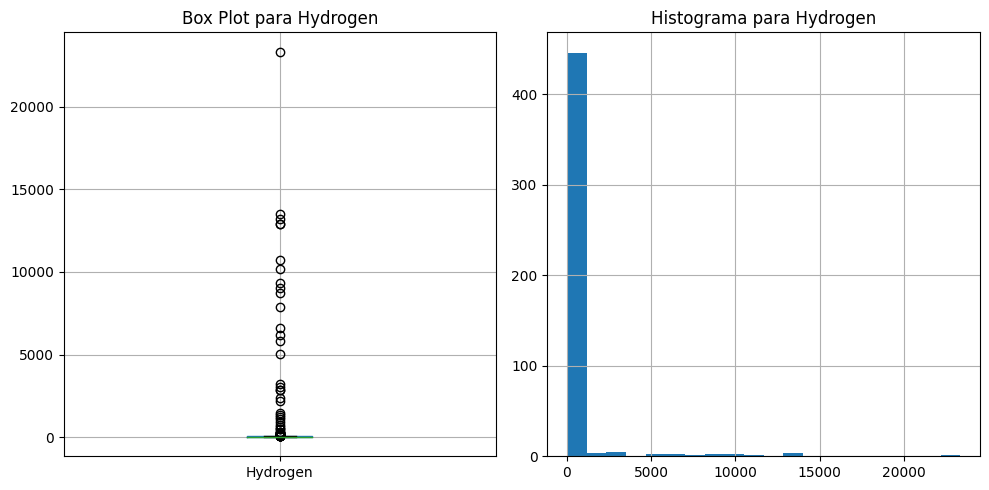

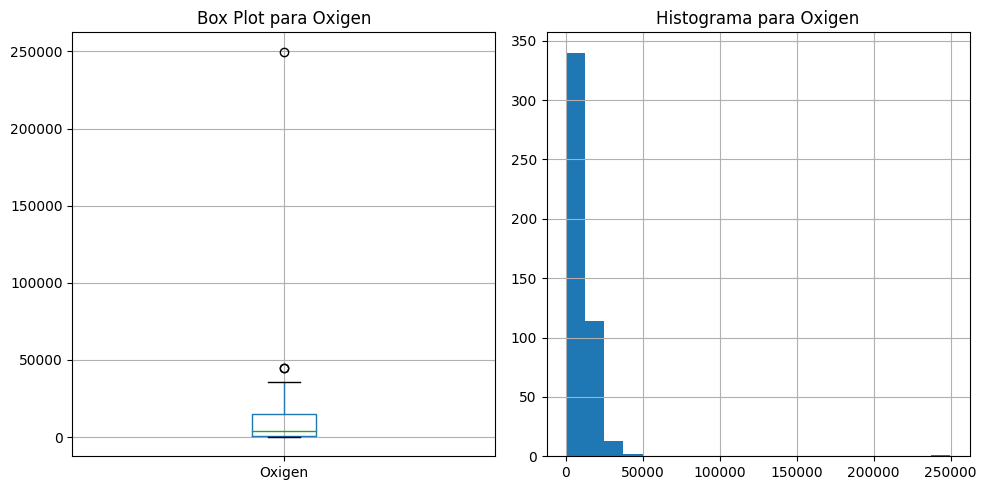

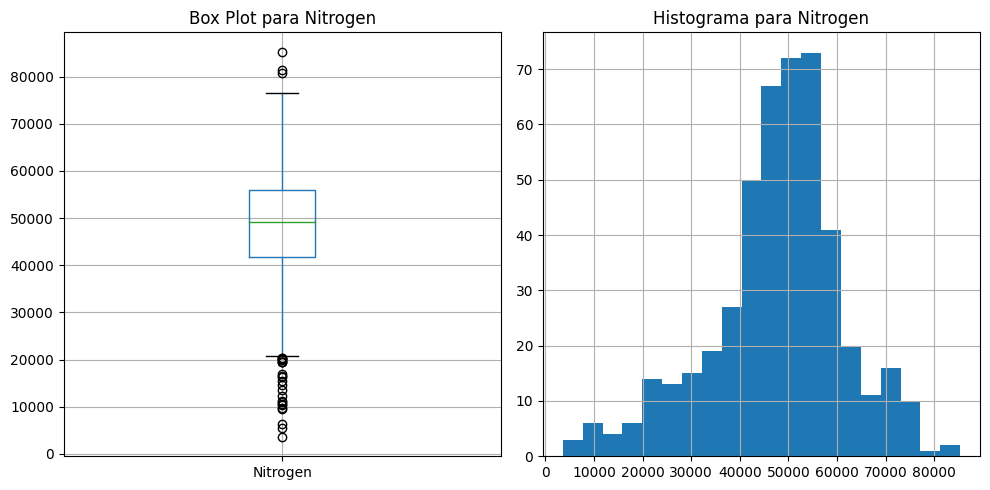

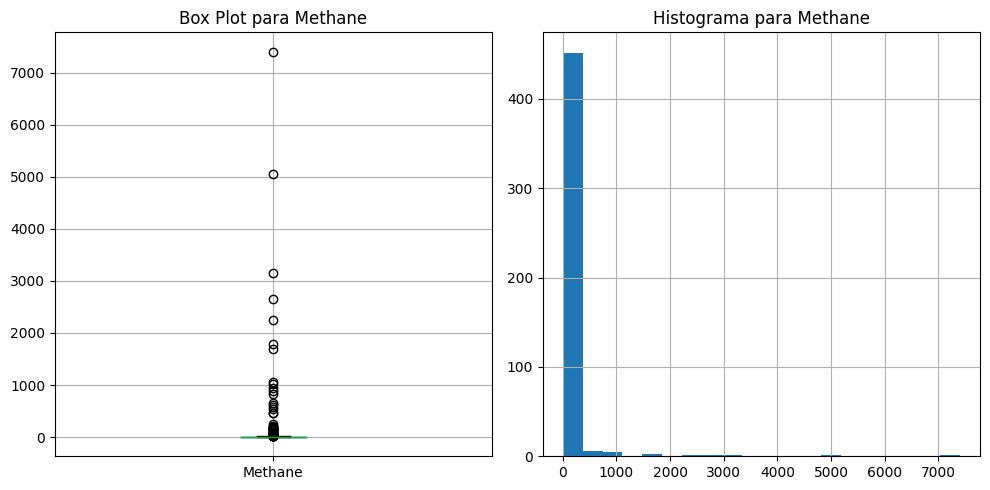

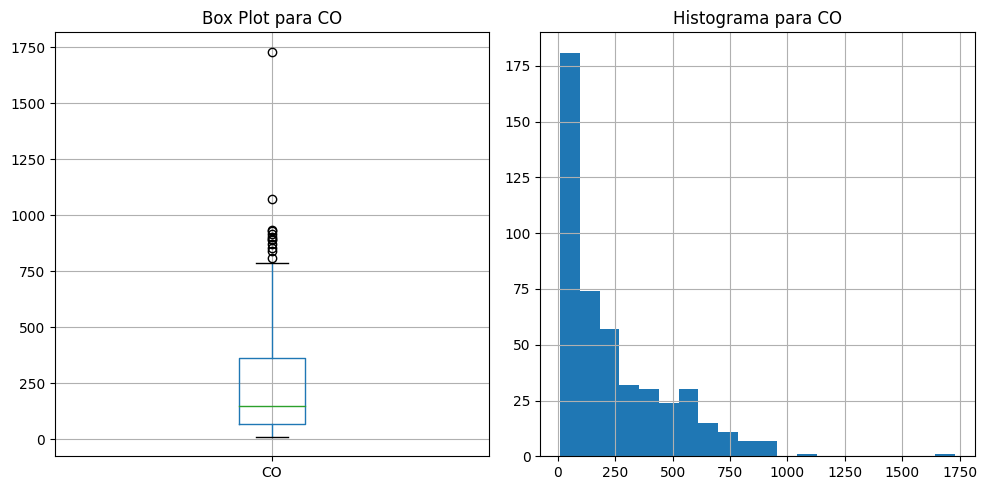

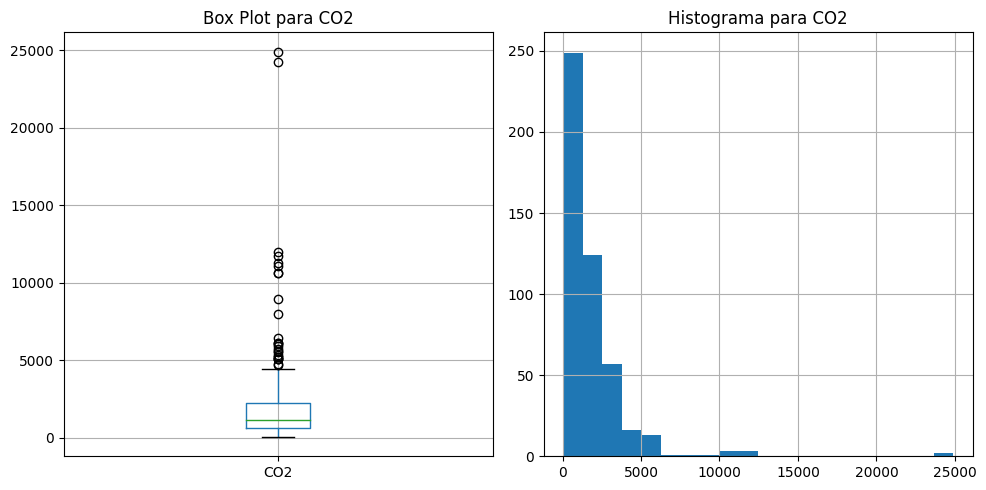

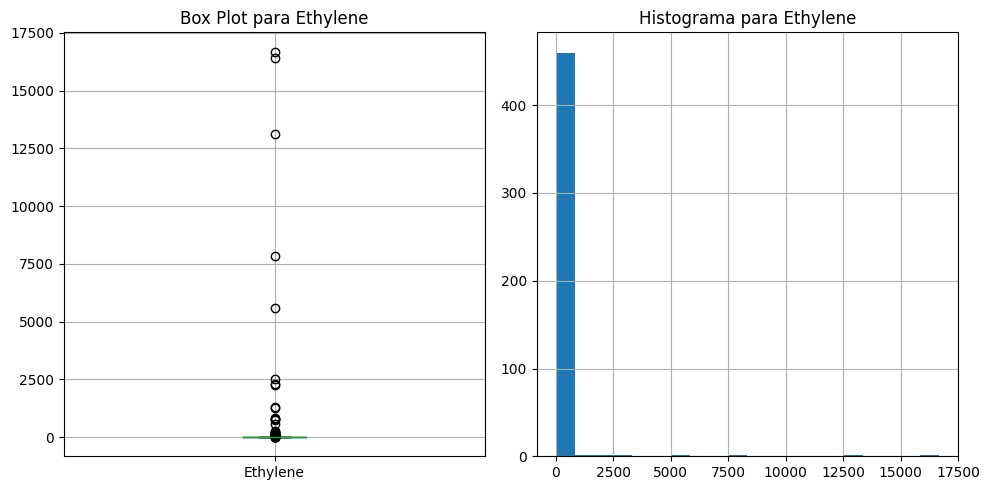

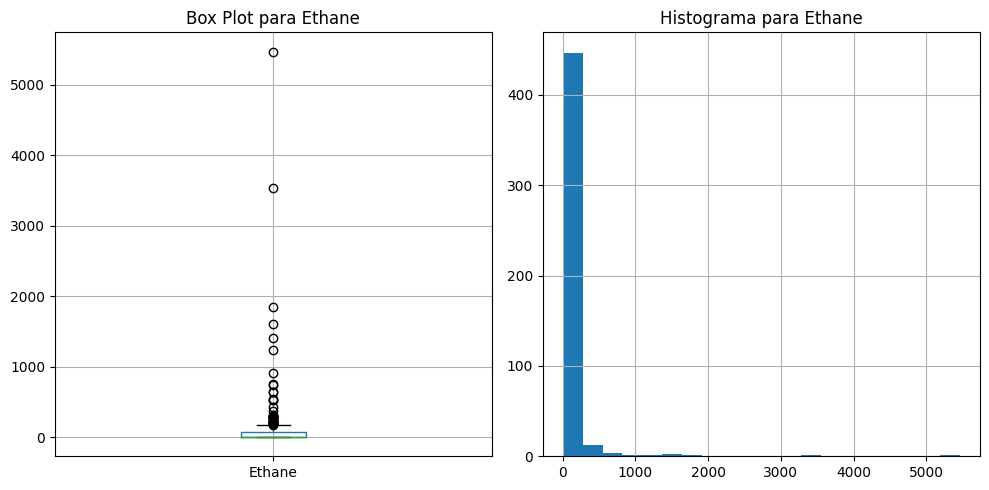

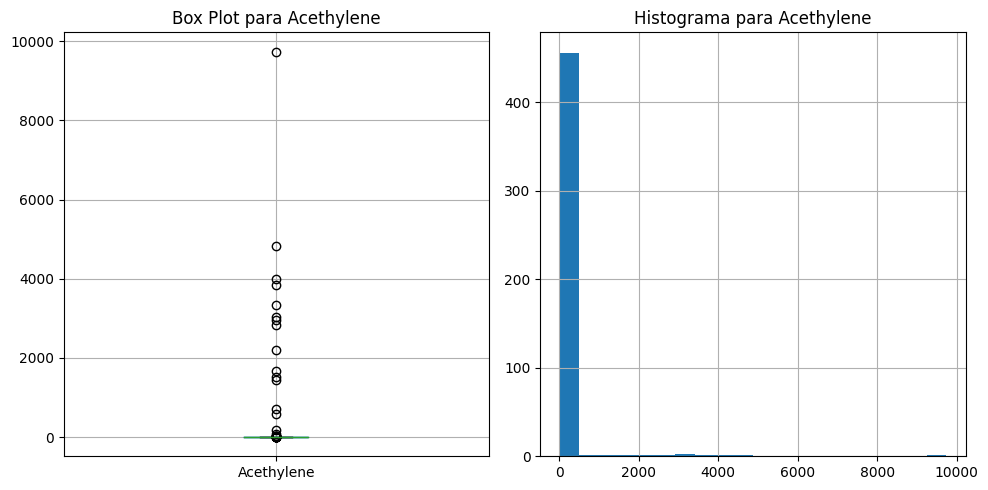

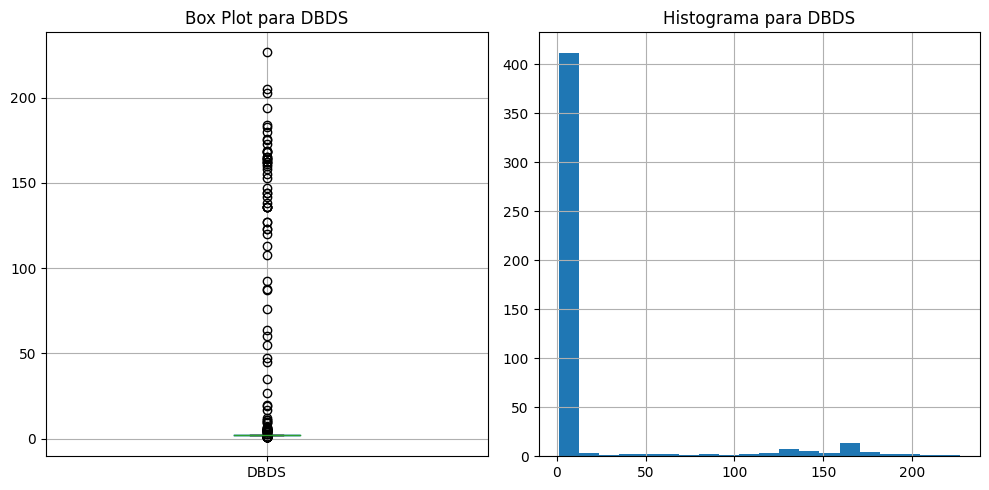

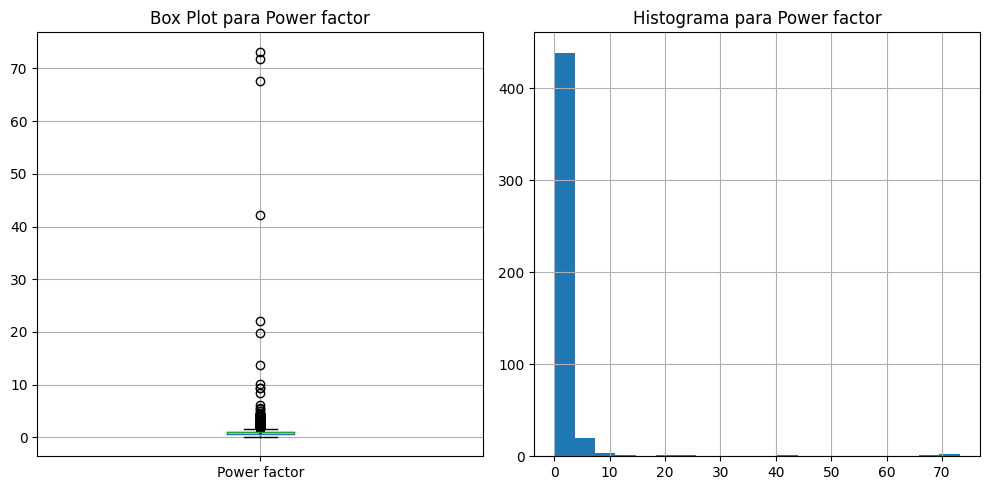

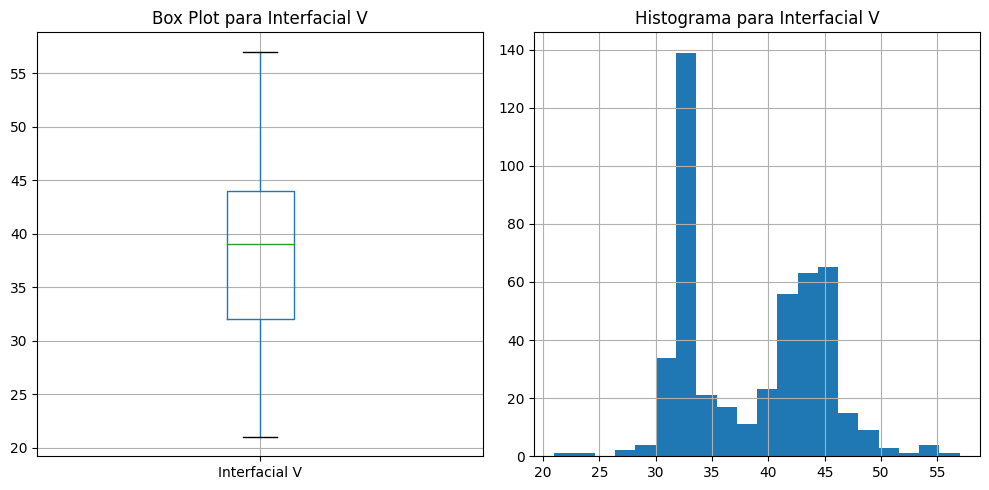

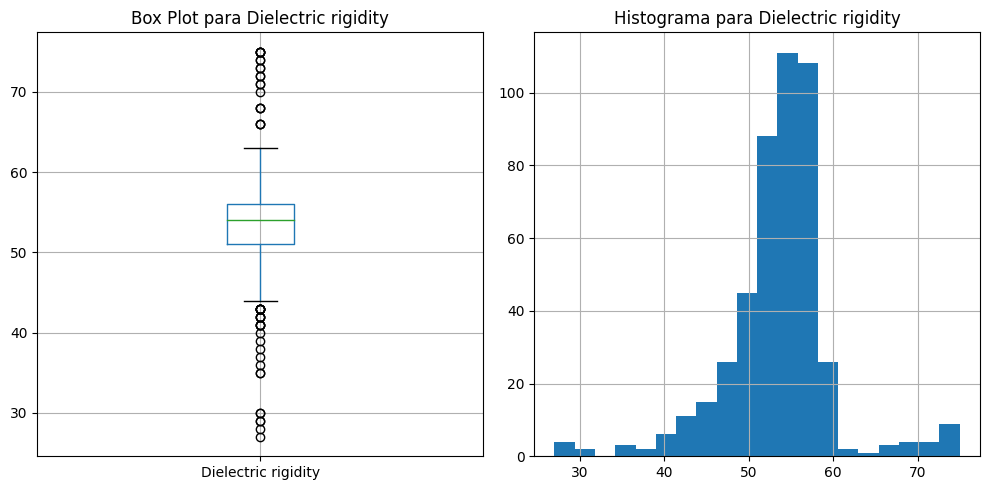

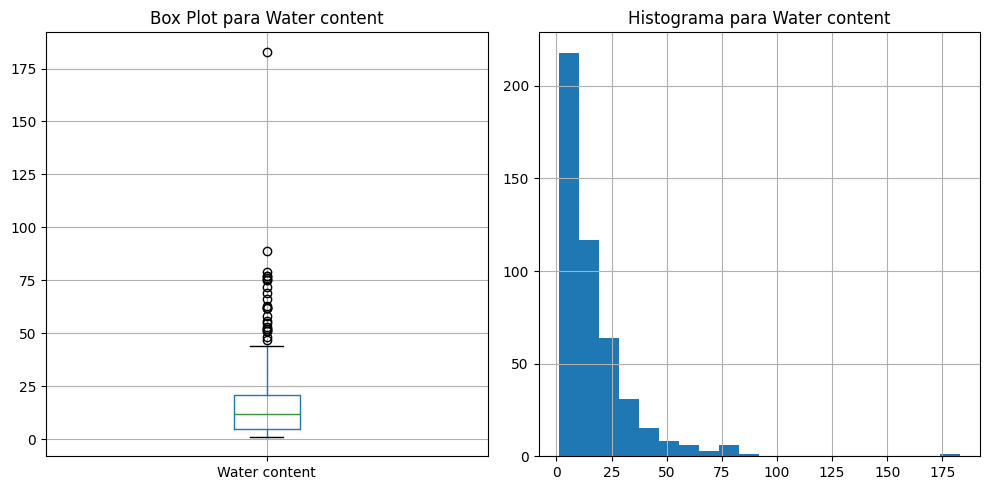

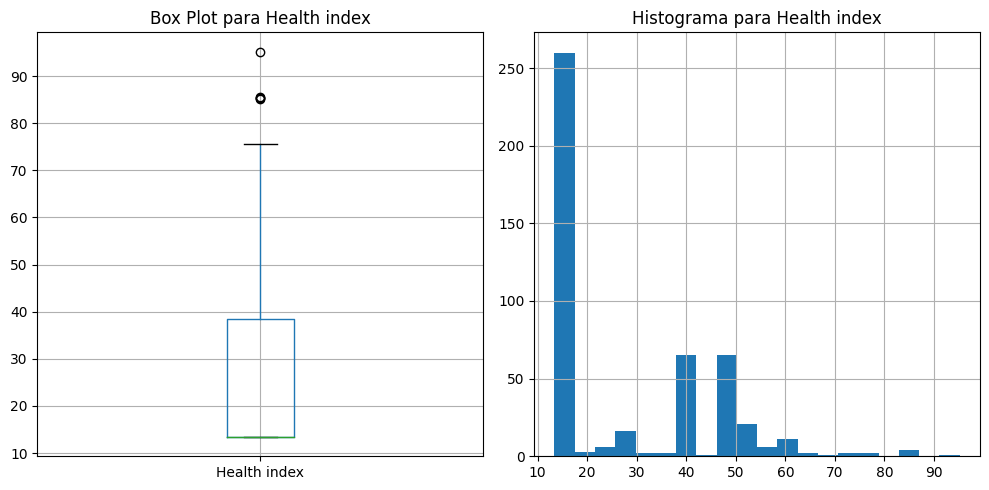

In [ ]:
colunas = new_df.columns.tolist()
for feature in colunas:
    if feature not in ["Life expectation", "class"]:
        # Gera gráficos de caixa e histograma para cada coluna
        plt.figure(figsize=(10,5))

        # Box plot
        plt.subplot(1, 2, 1)
        new_df.boxplot(column=feature)
        plt.title(f'Box Plot para {feature}')

        # Histograma
        plt.subplot(1, 2, 2)
        new_df[feature].hist(bins=20)
        plt.title(f'Histograma para {feature}')

        plt.tight_layout()
        plt.show()

Podemos observar pelos gráficos BoxPlot que existem algumas features com outliers. Dessa forma, vamos eliminar os outliers de cada uma delas.

## 2) Com base no que foi feito com os outros outliers da feature 'oxigen', remover os outliers das demais features. Para cada outlier, dependendo do contexto, escolha a forma como substitui-los.

In [ ]:
# Criar as classes do problema de classificação
new_df['class'] = new_df['Life expectation'].apply(map_condition) # Add uma nova coluna
print(new_df.groupby(['class']).size())



class
 10 < lf < 20    105
 20 < lf < 40     70
40 < lf < 60     213
lf < 10           82
dtype: int64


In [ ]:
# Divisão do dataframe por classes
df = {} # Criação de dicionário
update_df(new_df)

# Estatisticas de cada feature para cada classe
sts_very_low = df['very low'].describe()
sts_low = df['low'].describe()
sts_medium = df['medium'].describe()
sts_high = df['high'].describe()

In [ ]:
outliers_values = {"Hydrogen": 15000, "Oxigen": 40000, "Nitrogen": 80000,
                   "Methane": 2000, "CO": 1000, "CO2": 15000, "Ethylene": 7500,
                   "Acethylene": 3000, "Power factor": 30, "Water content": 100}
outliers_values

{'Hydrogen': 15000,
 'Oxigen': 40000,
 'Nitrogen': 80000,
 'Methane': 2000,
 'CO': 1000,
 'CO2': 15000,
 'Ethylene': 7500,
 'Acethylene': 3000,
 'Power factor': 30,
 'Water content': 100}

In [ ]:
index_outliers, all_outliers = get_outliers(new_df, outliers_values) # Cria lista com outliers para cada feature
index_outliers

{'Hydrogen': [13],
 'Oxigen': [45, 250, 395],
 'Nitrogen': [24, 63, 121],
 'Methane': [0, 5, 13, 15, 16],
 'CO': [19, 148],
 'CO2': [19, 361],
 'Ethylene': [0, 14, 15, 16],
 'Acethylene': [17, 18, 44, 45, 46, 47],
 'Power factor': [19, 38, 39, 40],
 'Water content': [386]}

# **Oxigen**

In [ ]:
new_df['Oxigen'].describe()

count       470.000000
mean       8357.372340
std       14164.233283
min          57.000000
25%         496.000000
50%        3810.000000
75%       14875.000000
max      249900.000000
Name: Oxigen, dtype: float64

In [ ]:
Q1 = 496
Q3 = 14875
I = Q3-Q1

max_1 = Q3 + 1.5*I
min_1 = Q1 - 1.5*I

In [ ]:
max_1

36443.5

In [ ]:
min_1

-21072.5

In [ ]:
# Obter os índices onde 'Oxigen' é maior que max_1
indices_outliers_oxigen_Max = new_df[new_df['Oxigen'] > max_1].index
# Remover os outliers de 'Oxigen'
new_df = new_df.drop(indices_outliers_oxigen_Max, axis=0)

In [ ]:
# Obter os índices onde 'Oxigen' é menor que min_1
indices_outliers_oxigen_Min = new_df[new_df['Oxigen'] < min_1].index
# Remover os outliers de 'Oxigen'
new_df = new_df.drop(indices_outliers_oxigen_Min, axis=0)

# **Hydrogen**

In [ ]:
new_df['Hydrogen'].describe()

count      467.000000
mean       407.689507
std       2008.123092
min          2.000000
25%          7.000000
50%          9.000000
75%         33.500000
max      23349.000000
Name: Hydrogen, dtype: float64

In [ ]:
Q1 = 7
Q3 = 33.5
I = Q3-Q1

max_2 = Q3 + 1.5*I
min_2 = Q1 - 1.5*I

In [ ]:
indices_outliers_Hydrogen_Max = new_df[new_df['Hydrogen'] > max_2].index
new_df = new_df.drop(indices_outliers_Hydrogen_Max, axis=0)

In [ ]:
indices_outliers_Hydrogen_Min = new_df[new_df['Hydrogen'] < min_2].index
new_df = new_df.drop(indices_outliers_Hydrogen_Min, axis=0)


# **Nitrogen**

In [ ]:
new_df['Nitrogen'].describe()

count      411.000000
mean     47294.824818
std      13588.622438
min       3600.000000
25%      41700.000000
50%      48813.000000
75%      55550.000000
max      85300.000000
Name: Nitrogen, dtype: float64

In [ ]:
Q1 = 41700
Q3 = 55550
I = Q3-Q1

max_3 = Q3 + 1.5*I
min_3 = Q1 - 1.5*I

In [ ]:
indices_outliers_Nitrogen_Max = new_df[new_df['Nitrogen'] > max_3].index
new_df = new_df.drop(indices_outliers_Nitrogen_Max, axis=0)

In [ ]:
indices_outliers_Nitrogen_Min = new_df[new_df['Nitrogen'] < min_3].index
new_df = new_df.drop(indices_outliers_Nitrogen_Min, axis=0)

# **Methane**

In [ ]:
new_df['Methane'].describe()

count    383.000000
mean       5.966057
std       11.593977
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max      161.000000
Name: Methane, dtype: float64

In [ ]:
Q1 = 3
Q3 = 5
I = Q3-Q1

max_4 = Q3 + 1.5*I
min_4 = Q1 - 1.5*I

In [ ]:
indices_outliers_Methane_Max = new_df[new_df['Methane'] > max_4].index
new_df = new_df.drop(indices_outliers_Methane_Max, axis=0)

In [ ]:
indices_outliers_Methane_Min = new_df[new_df['Methane'] < min_4].index
new_df = new_df.drop(indices_outliers_Methane_Min, axis=0)

# **CO2**

In [ ]:
new_df['CO2'].describe()

count      333.000000
mean      1449.138138
std       1703.423611
min         93.000000
25%        609.000000
50%        908.000000
75%       2010.000000
max      24200.000000
Name: CO2, dtype: float64

In [ ]:
Q1 = 609
Q3 = 2010
I = Q3-Q1

max_5 = Q3 + 1.5*I
min_5 = Q1 - 1.5*I

In [ ]:
indices_outliers_CO2_Max = new_df[new_df['CO2'] > max_5].index
new_df = new_df.drop(indices_outliers_CO2_Max, axis=0)

In [ ]:
indices_outliers_CO2_Min = new_df[new_df['CO2'] < min_5].index
new_df = new_df.drop(indices_outliers_CO2_Min, axis=0)

# **CO**

In [ ]:
new_df['CO'].describe()

count     320.00000
mean      210.31250
std       221.65911
min        10.00000
25%        51.00000
50%        97.50000
75%       319.00000
max      1070.00000
Name: CO, dtype: float64

In [ ]:
Q1 = 51
Q3 = 319
I = Q3-Q1

max_6 = Q3 + 1.5*I
min_6 = Q1 - 1.5*I

In [ ]:
indices_outliers_CO_Max = new_df[new_df['CO'] > max_6].index
new_df = new_df.drop(indices_outliers_CO_Max, axis=0)

In [ ]:
indices_outliers_CO_Min = new_df[new_df['CO'] < min_6].index
new_df = new_df.drop(indices_outliers_CO_Min, axis=0)

# **Ethylene**

In [ ]:
new_df['Ethylene'].describe()

count    308.000000
mean       5.237013
std        6.915426
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max       66.000000
Name: Ethylene, dtype: float64

In [ ]:
Q1 = 3
Q3 = 4
I = Q3-Q1

max_7 = Q3 + 1.5*I
min_7 = Q1 - 1.5*I

In [ ]:
indices_outliers_Ethylene_Max = new_df[new_df['Ethylene'] > max_7].index
new_df = new_df.drop(indices_outliers_Ethylene_Max, axis=0)

In [ ]:
indices_outliers_Ethylene_Min = new_df[new_df['Ethylene'] < min_7].index
new_df = new_df.drop(indices_outliers_Ethylene_Min, axis=0)

# **Acethylene**

In [ ]:
new_df['Acethylene'].describe()

count    255.000000
mean       0.078431
std        0.727501
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       11.000000
Name: Acethylene, dtype: float64

In [ ]:
Q1 = 0
Q3 = 0
I = Q3-Q1

max_8 = Q3 + 1.5*I
min_8 = Q1 - 1.5*I

In [ ]:
indices_outliers_Acethylene_Max = new_df[new_df['Acethylene'] > max_8].index
new_df = new_df.drop(indices_outliers_Acethylene_Max, axis=0)

In [ ]:
indices_outliers_Acethylene_Min = new_df[new_df['Acethylene'] < min_8].index
new_df = new_df.drop(indices_outliers_Acethylene_Min, axis=0)

# **Power factor**

In [ ]:
new_df['Power factor'].describe()

count    248.000000
mean       1.346089
std        1.134160
min        0.050000
25%        1.000000
50%        1.000000
75%        1.020000
max        9.430000
Name: Power factor, dtype: float64

In [ ]:
Q1 = 1
Q3 = 1.02
I = Q3-Q1

max_9 = Q3 + 1.5*I
min_9 = Q1 - 1.5*I

In [ ]:
indices_outliers_Power_factor_Max = new_df[new_df['Power factor'] > max_9].index
new_df = new_df.drop(indices_outliers_Power_factor_Max, axis=0)

In [ ]:
indices_outliers_Power_factor_Min = new_df[new_df['Power factor'] < min_9].index
new_df = new_df.drop(indices_outliers_Power_factor_Min, axis=0)

# **Water content**

In [ ]:
new_df['Water content'].describe()

count    133.000000
mean      22.639098
std       21.105198
min        3.000000
25%       12.000000
50%       18.000000
75%       26.000000
max      183.000000
Name: Water content, dtype: float64

In [ ]:
Q1 = 12
Q3 = 26
I = Q3-Q1

max_10 = Q3 + 1.5*I
min_10 = Q1 - 1.5*I

In [ ]:
indices_outliers_Water_content_Max = new_df[new_df['Water content'] > max_10].index
new_df = new_df.drop(indices_outliers_Water_content_Max, axis=0)

In [ ]:
indices_outliers_Water_content_Min = new_df[new_df['Water content'] < min_10].index
new_df = new_df.drop(indices_outliers_Water_content_Min, axis=0)

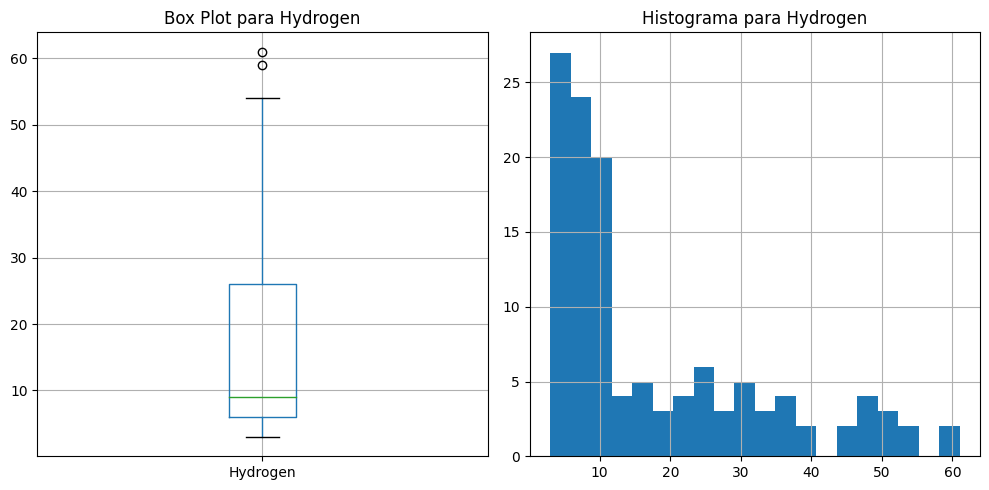

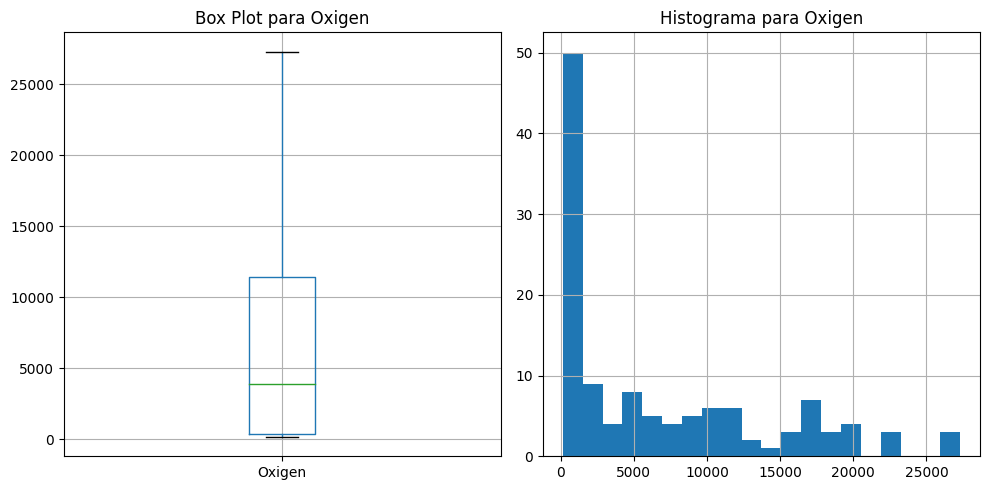

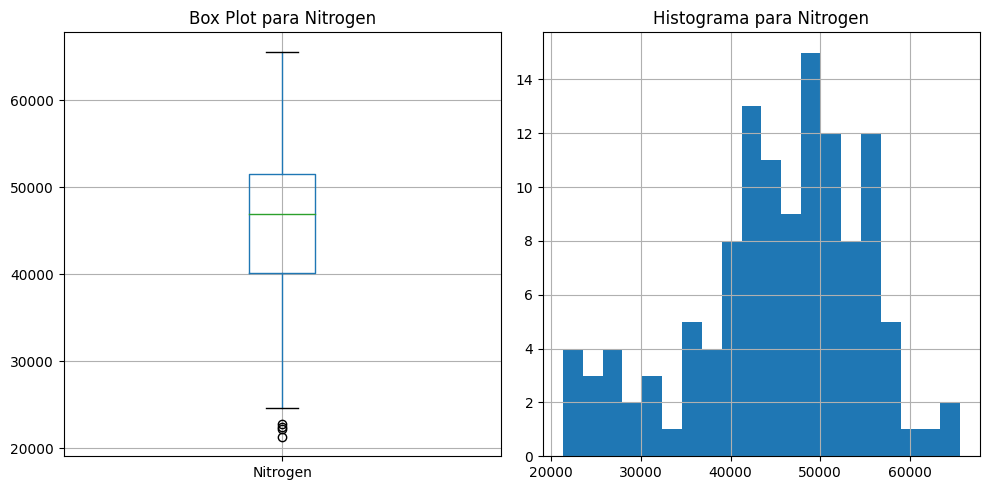

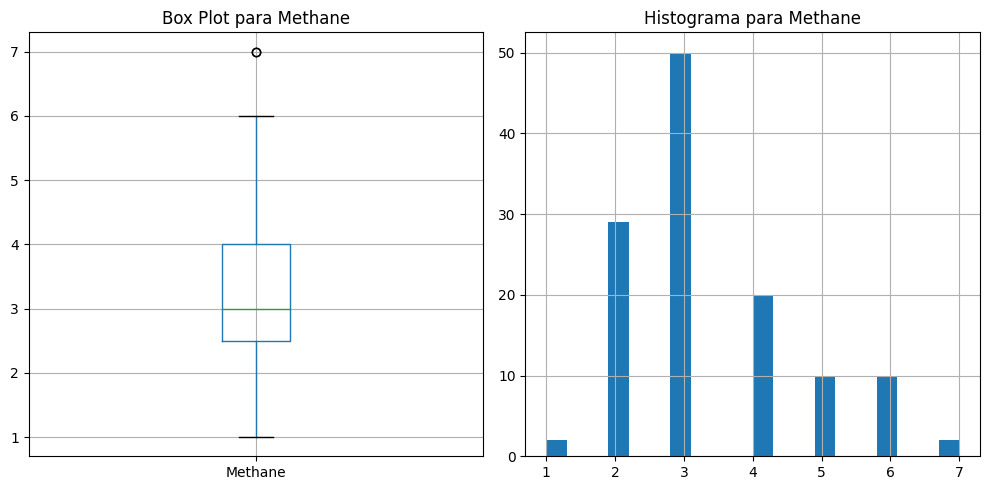

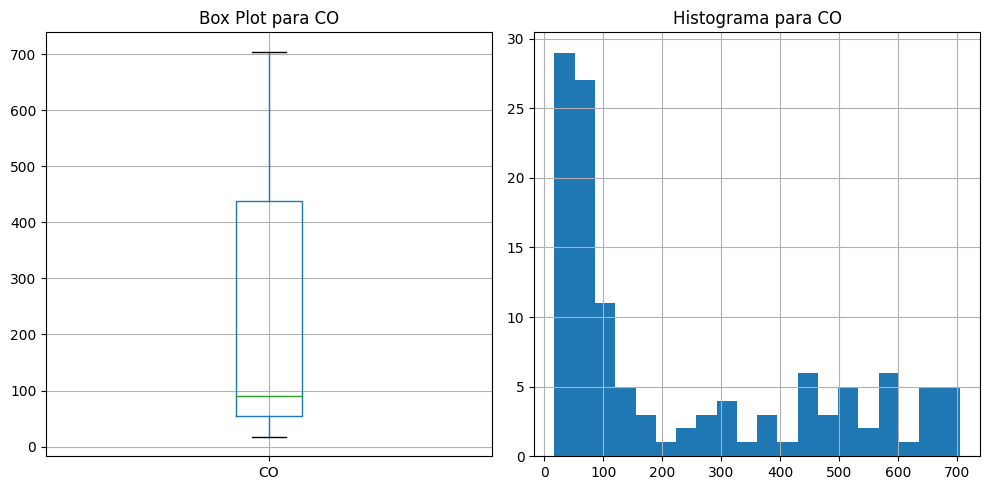

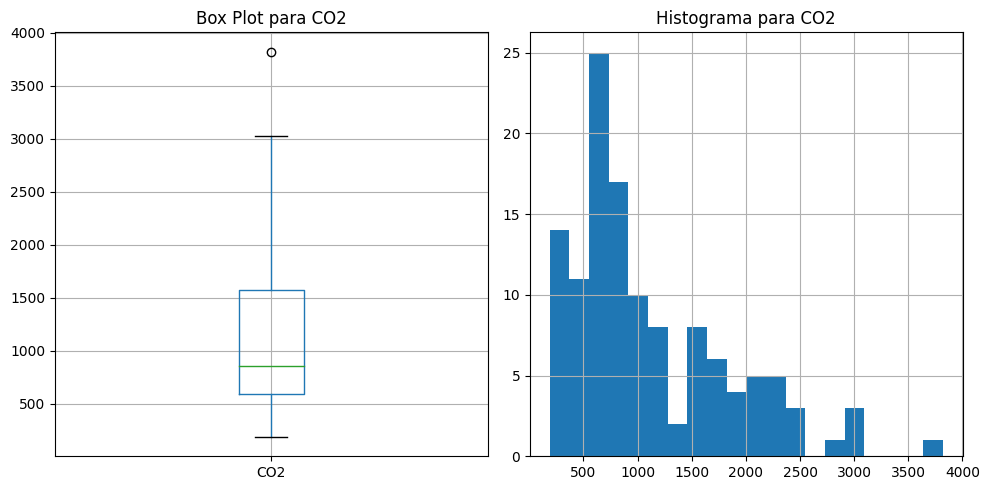

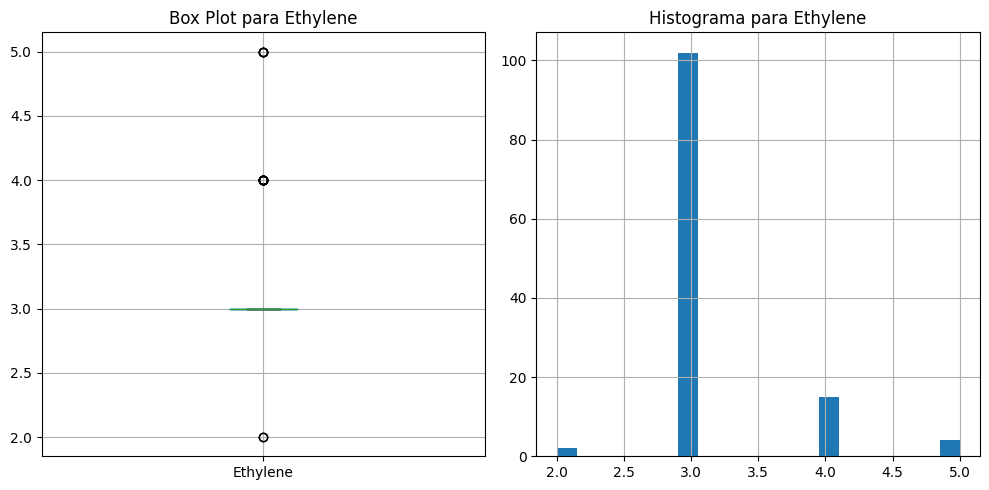

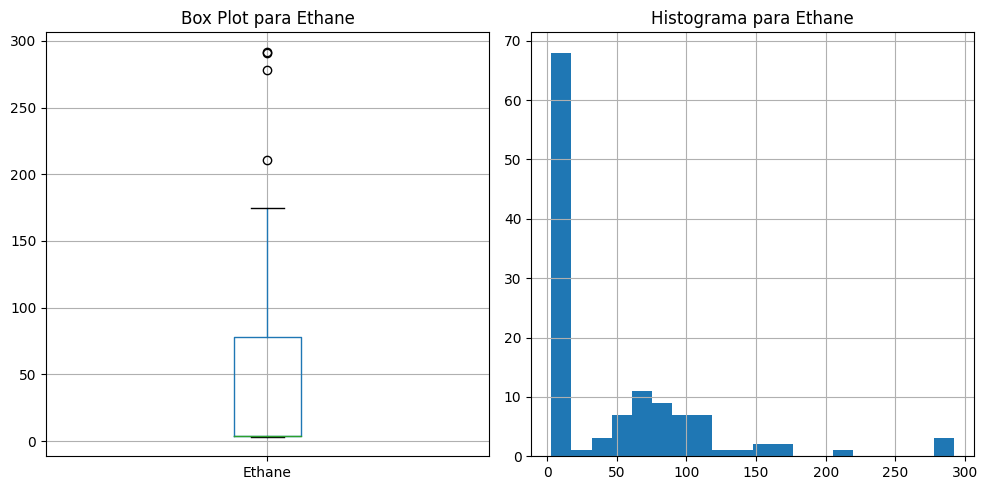

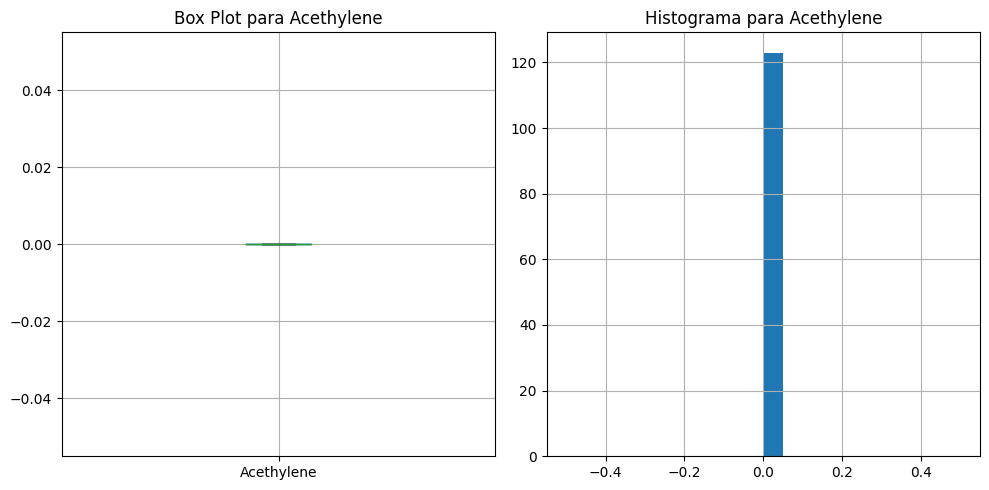

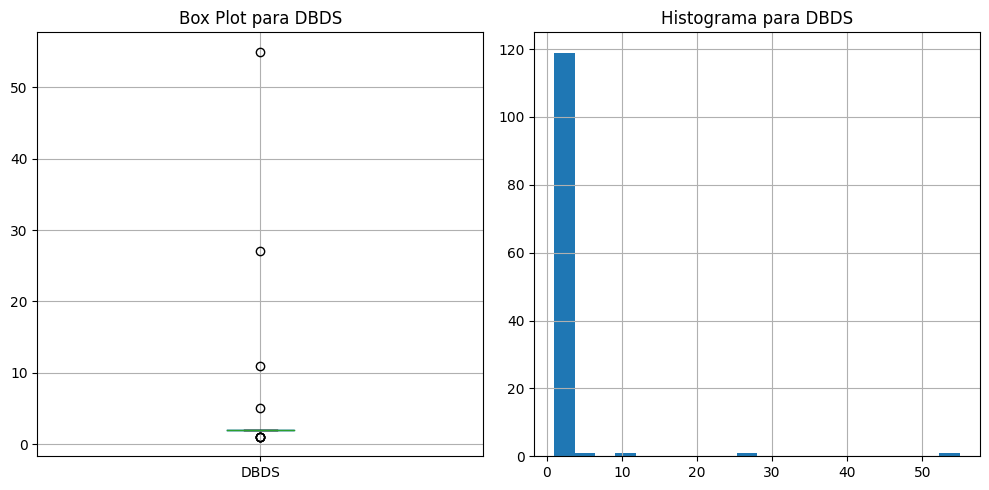

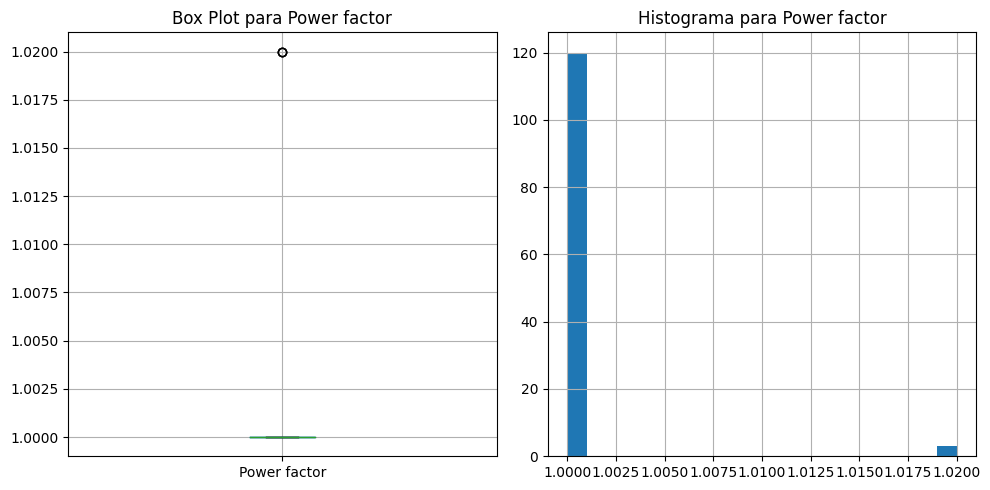

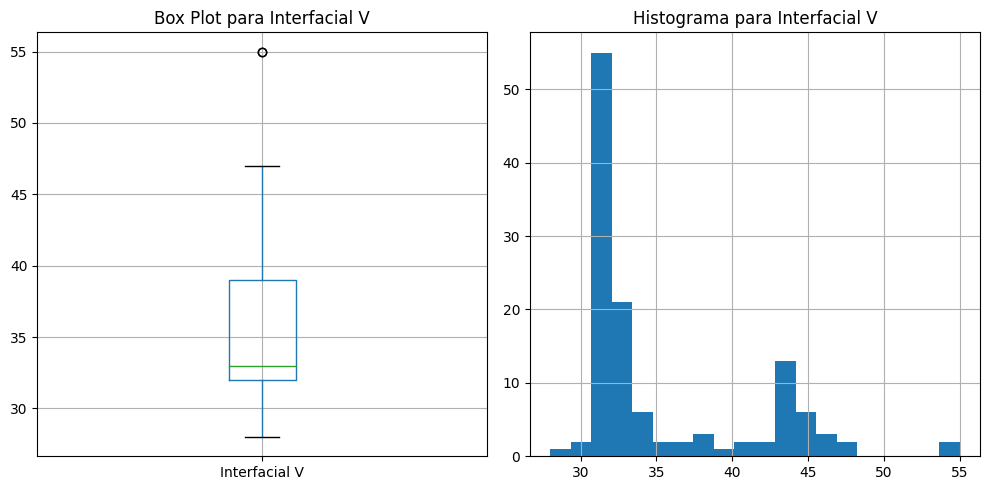

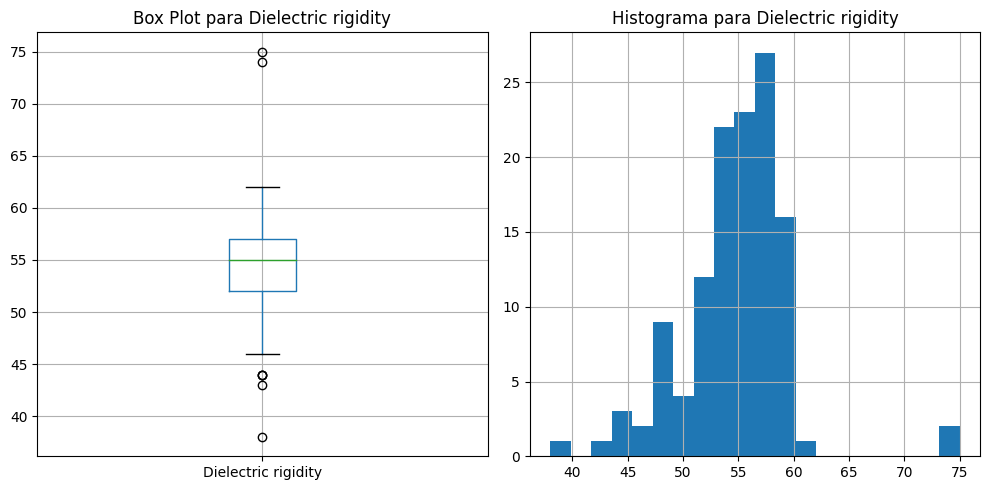

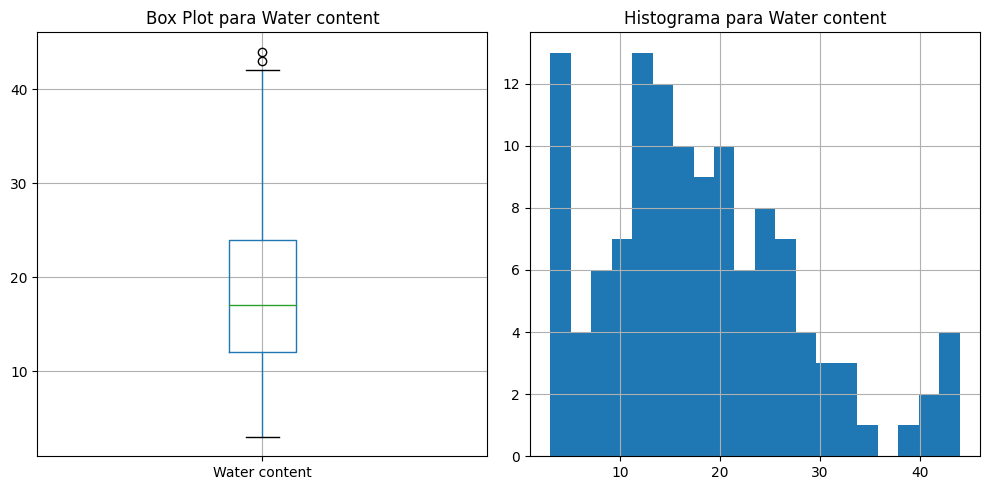

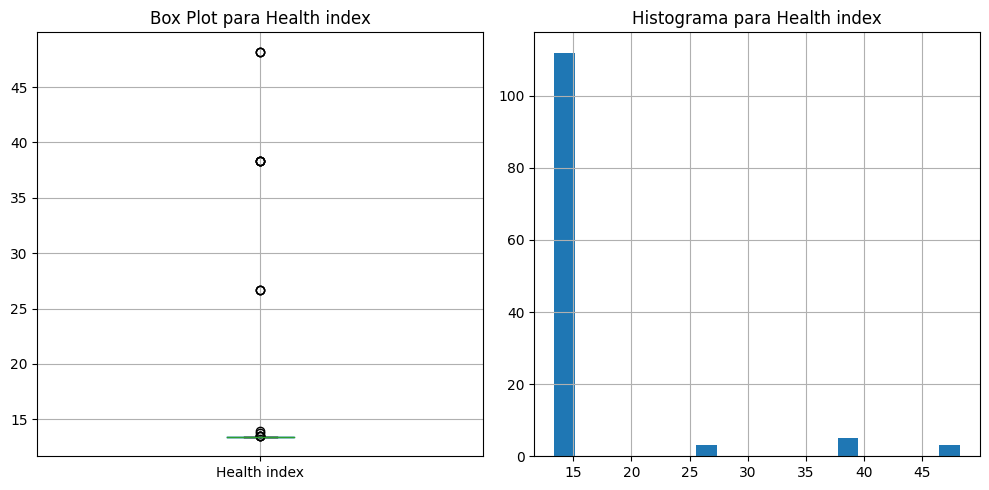

In [ ]:
colunas = new_df.columns.tolist()
for feature in colunas:
    if feature not in ["Life expectation", "class"]:
        # Gera gráficos de caixa e histograma para cada coluna
        plt.figure(figsize=(10,5))

        # Box plot
        plt.subplot(1, 2, 1)
        new_df.boxplot(column=feature)
        plt.title(f'Box Plot para {feature}')

        # Histograma
        plt.subplot(1, 2, 2)
        new_df[feature].hist(bins=20)
        plt.title(f'Histograma para {feature}')

        plt.tight_layout()
        plt.show()

##(3) Conforme visto na etapa da visualização dos dados, para a classe    '40 < lf < 60', não há nenhum caso em que o 'Health index' do trafo é superior a 31, o que pode levar o classificador a pensar que  trafos com baixo 'Health index' possuem alta expectativa de vida, o que não é verdade. Por isso, para os casos em que 'Health index' é igual a 13.4 (maior ocorrência), alterar os valores dessa feature para valores aleatórios entre 30 e 80, com uma casa decimal. Dica: utilize a função random.uniform(min, max), pertencente à biblioteca random, para gerar os novos valores de forma aleatória e a função round(valor, numero_de_casas_decimais) para que ele fique com apenas umacasa decimal.

In [ ]:
# Para a feature "health index" na classe "40 < lf < 60"
print(df['high'].groupby(['Health index']).size())

index = df['high'].index[df['high']['Health index'] == 13.4].tolist()
print(len(index))

Health index
13.4    176
13.5      8
13.6      2
13.7      2
13.8      2
13.9      2
16.2      1
16.6      1
17.5      1
19.5      1
19.8      1
21.6      1
21.9      1
22.5      1
23.0      1
26.6      4
26.7      7
31.0      1
dtype: int64
176


<ipython-input-520-676dc22f8999>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = new_df.corr()


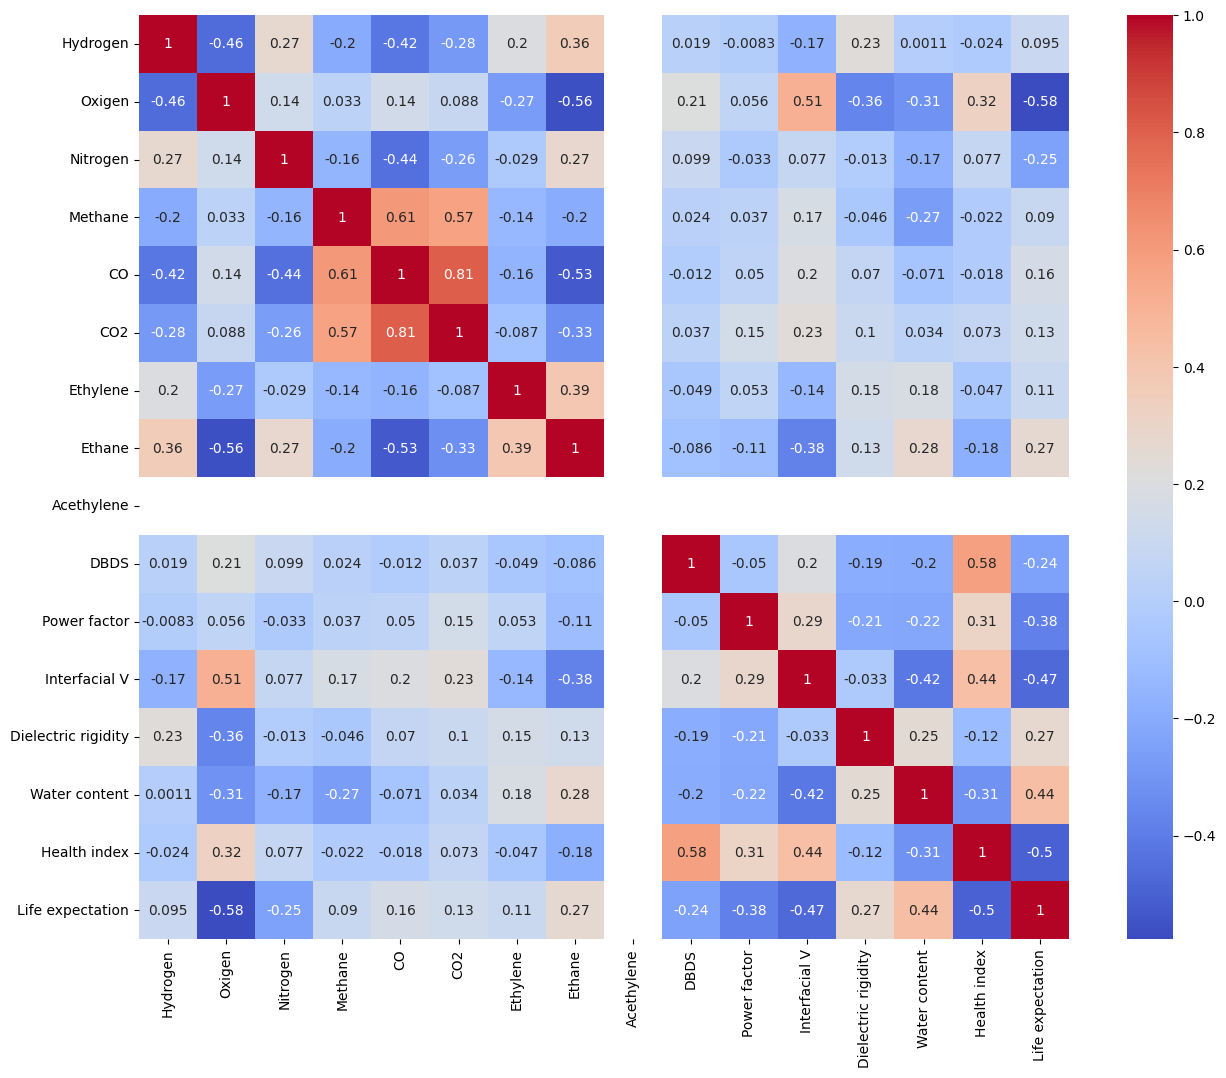

In [ ]:
corrmat = new_df.corr()
plt.figure(figsize=(15,12))
srn.heatmap(new_df[corrmat.index].corr(), annot=True, cmap = 'coolwarm')
plt.savefig("correlation_map.png") #Salvar em imag png

## **(4) O que pode ser pode ser concluido com base no mapa de correlação das features do dataframe em estudo?**

Quando o coeficiente de brilho está próximo de 1, há um forte brilho positivo(cor vermelha). Isso indica que, à medida que uma variável aumenta, outra também tende a aumentar proporcionalmente. Essa é a correlação positiva.  

Por outro lado, quando o coeficiente de brilho está próximo de -1, há um forte brilho negativo(cor azul). Isso indica que, à medida que uma variável aumenta, a outra tende a diminuir. Essa é a correlação negativa.

<Figure size 3000x1800 with 0 Axes>

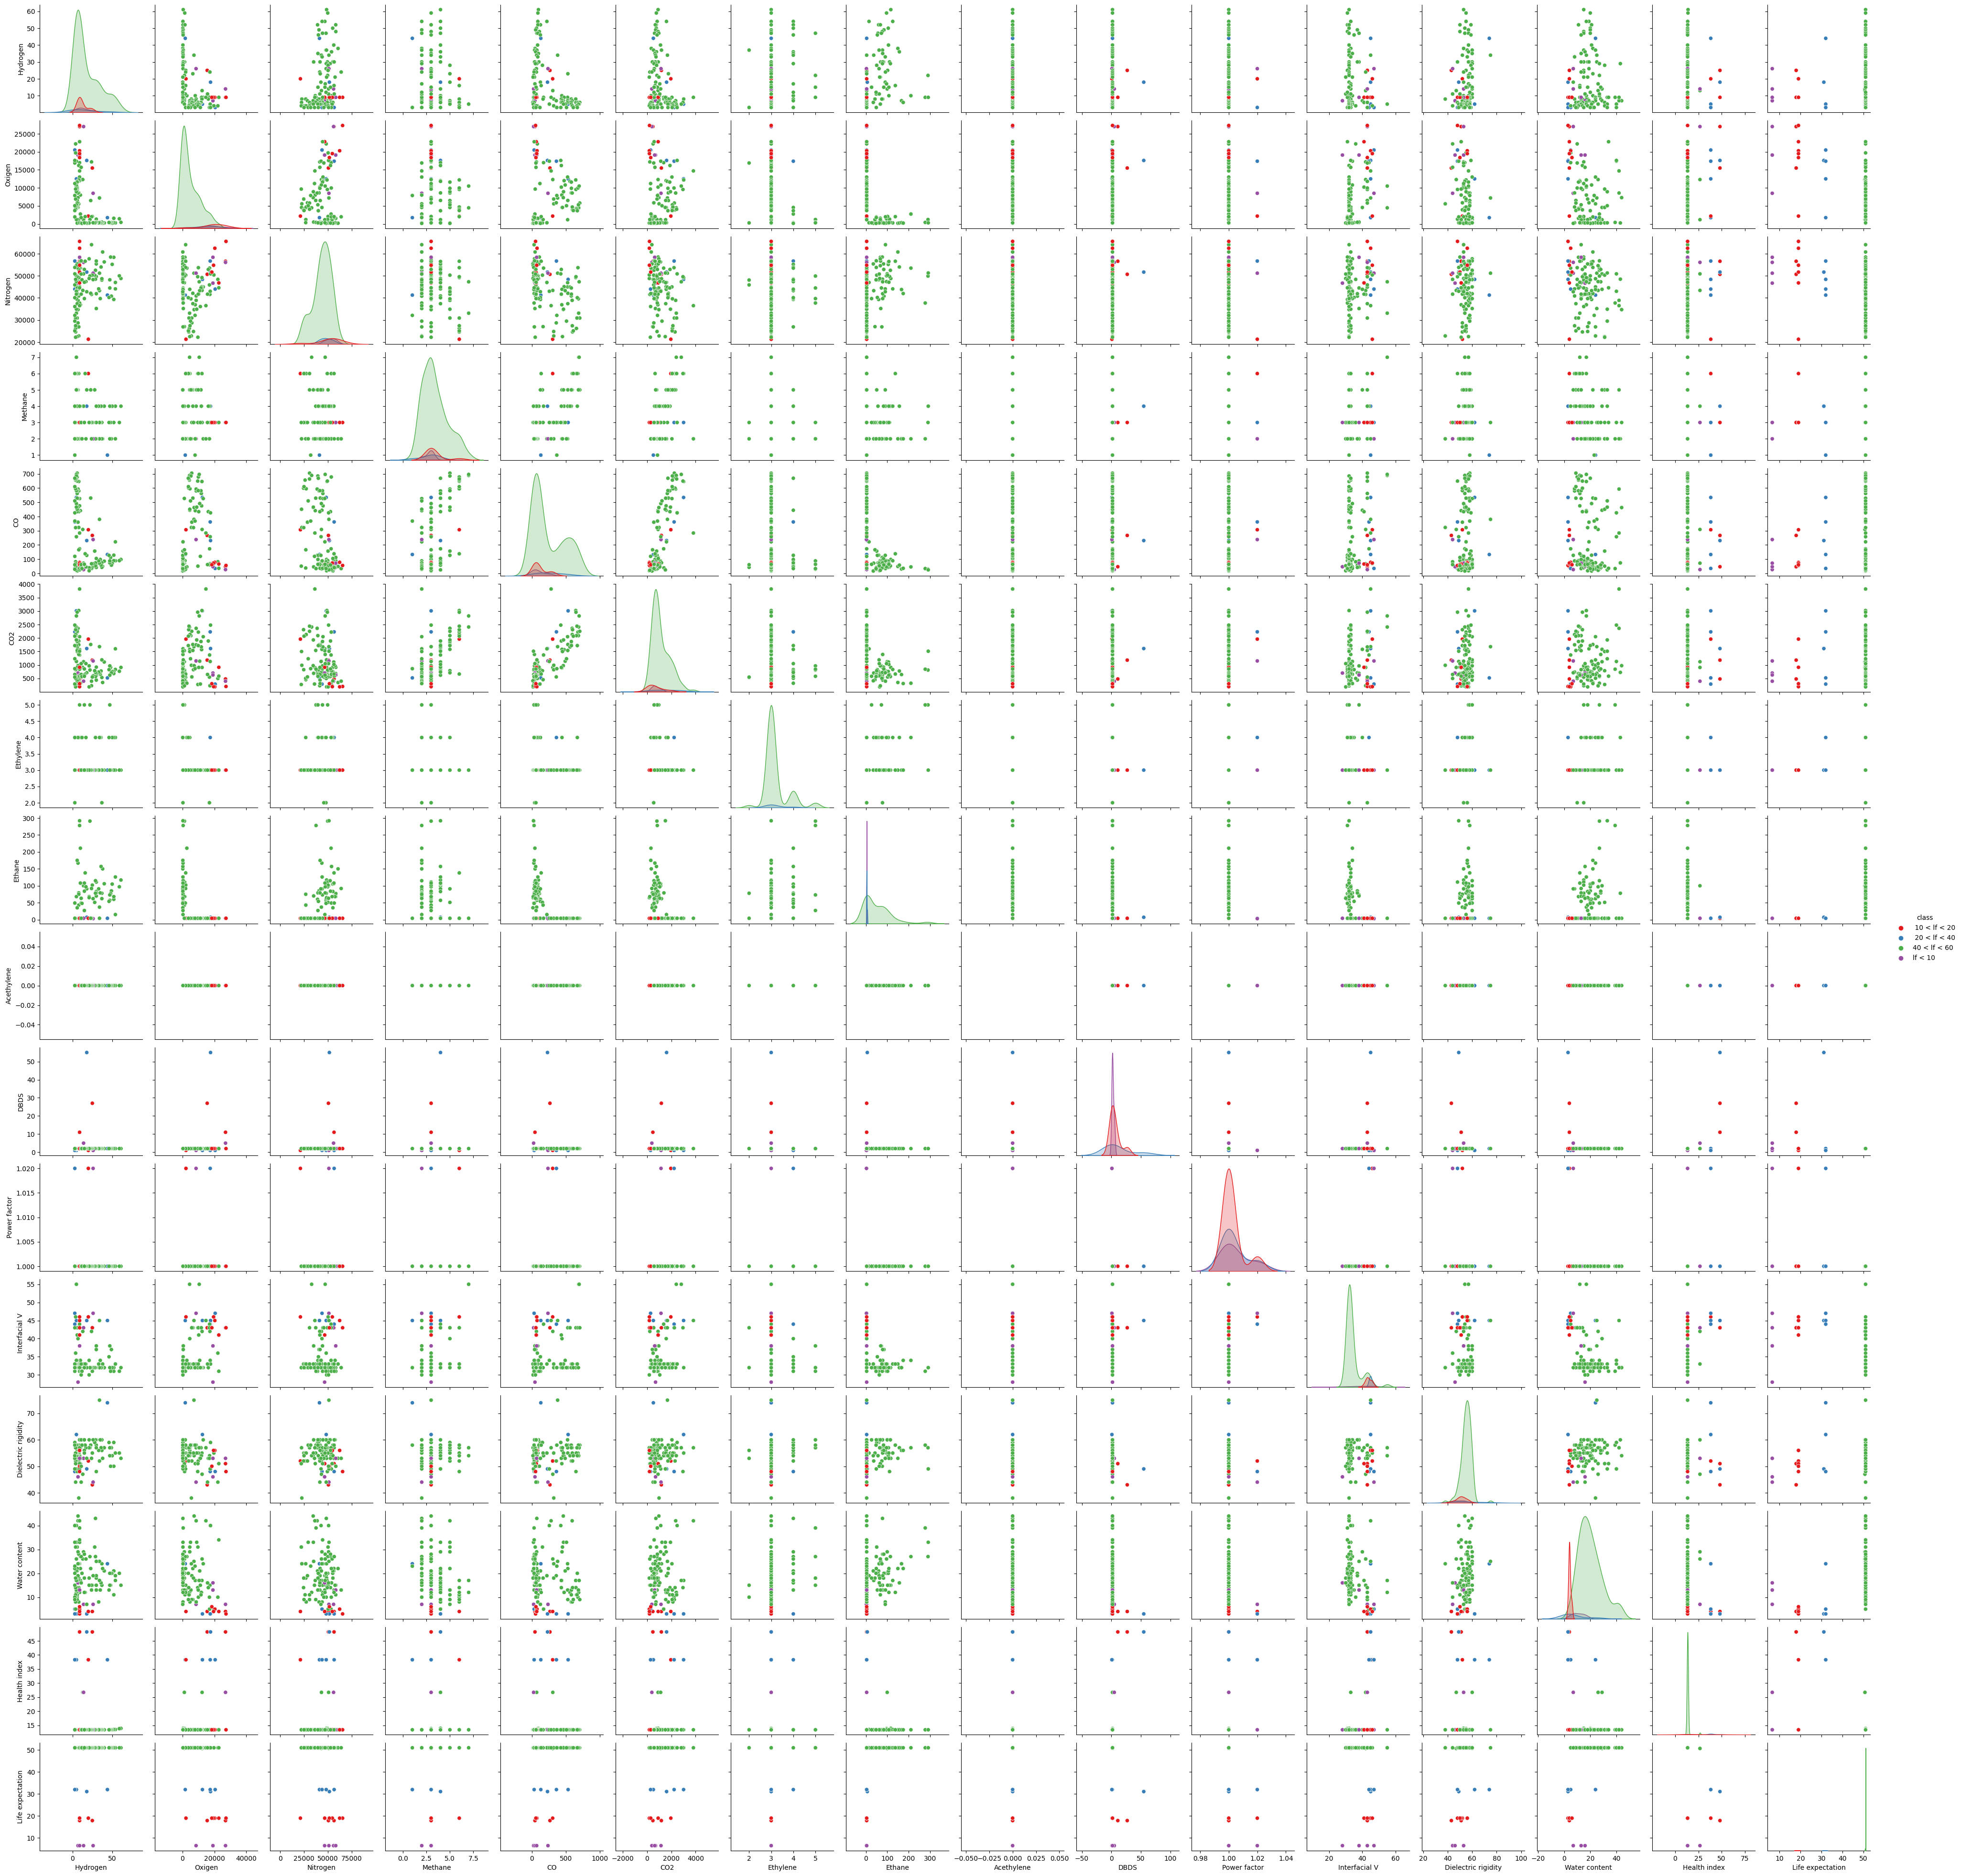

In [ ]:
# Gráficos de dispersão
plt.figure(figsize=(30, 18)) # Tamanho da figura
srn.pairplot(new_df, hue = 'class', palette = 'Set1')
plt.savefig("pairplot.png")

##**(5) Escolhers os gráficos de dispersão mais relevantes, imprimi-los em gráficos individuais e escrever sobre o que se pode concluir a respeito dos mesmos Dica: utilize a função srn.scatterplot(), da biblioteca seaborn;**

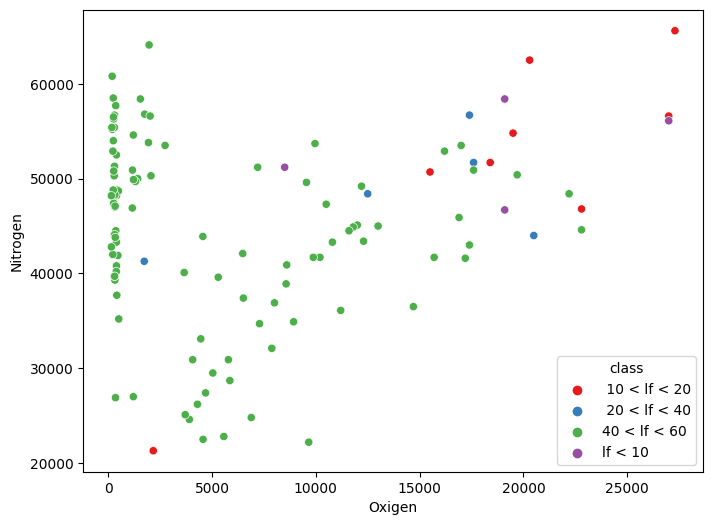

In [ ]:
plt.figure(figsize=(8, 6))
x = new_df['Oxigen']
y = new_df['Nitrogen']
srn.scatterplot(data=new_df, x=new_df['Oxigen'], y=new_df['Nitrogen'], hue='class', palette='Set1')
plt.show()

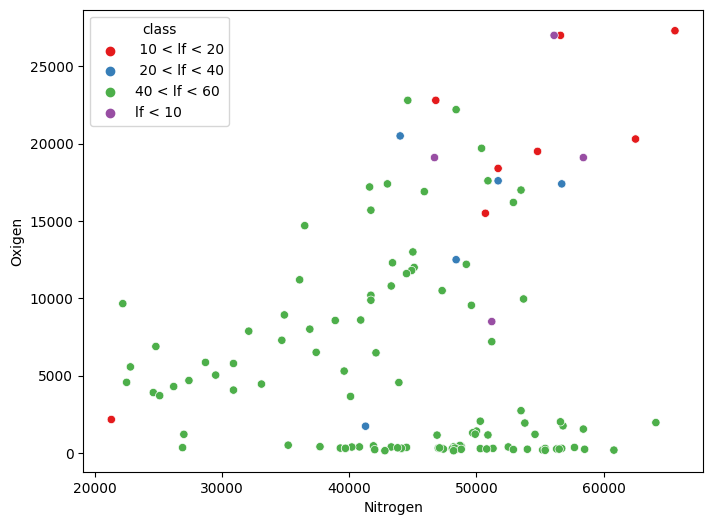

In [ ]:
plt.figure(figsize=(8, 6))
x = new_df['Nitrogen']
y = new_df['Oxigen']
srn.scatterplot(data=new_df, x=new_df['Nitrogen'], y=new_df['Oxigen'], hue='class', palette='Set1')
plt.show()


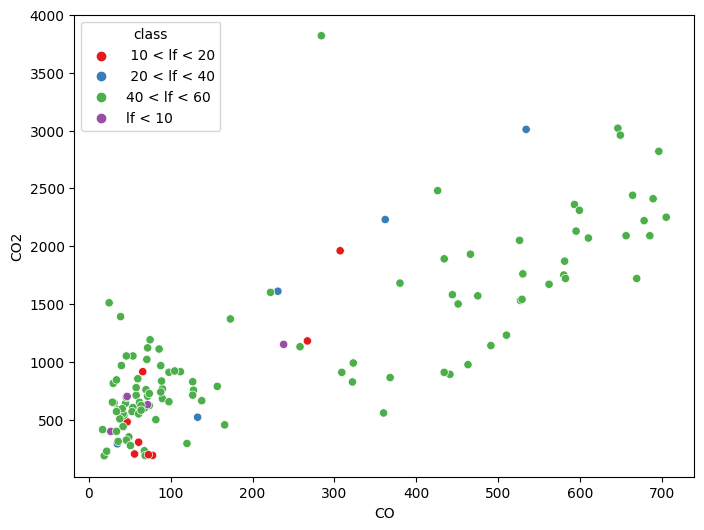

In [ ]:
plt.figure(figsize=(8, 6))
x = new_df['CO']
y = new_df['CO2']
srn.scatterplot(data=new_df, x=new_df['CO'], y=new_df['CO2'], hue='class', palette='Set1')
plt.show()

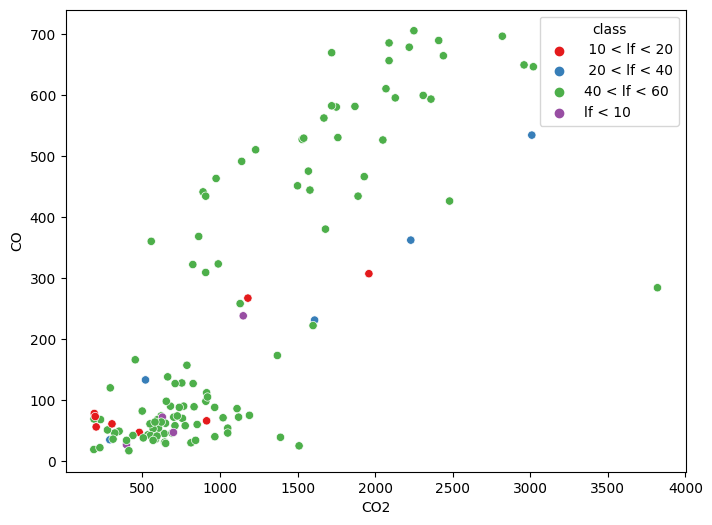

In [ ]:
plt.figure(figsize=(8, 6))
x = new_df['CO2']
y = new_df['CO']
srn.scatterplot(data=new_df, x=new_df['CO2'], y=new_df['CO'], hue='class', palette='Set1')
plt.show()